# Programming for Data Analysis Project: Simulating a Dataset

I found this project very hard to get a phenomenon that I was happy with.  My initial thought was to do a dataset with Economic Indicators but when I thought about it, something like currency or share prices are not random.  There is a  movement to them rather than just purely a random set of numbers.

Then I thought of doing a dataset on the length of the morning school trip with the variables of weather, time of year, day of the week, setting out time and how many cars were coming before we got out onto the main road.  But I thought that was too subjective and simplistic.

I then turned my attention to the fact that there is no longer a job for life and how long people stay in their jobs and what factors cause them to movce jobs.  After getting no replies form the many online Irish jobs sites for information on their job surveys I shelved this idea.

My attention then went back to the cso.ie website and I found a travel survey.  I had decided to look at a travel dataset. I wanted to look at how people travel, how long they travel for, distance covered and the reason for the travel all of these for inside and outside of dublin.  

But because there were only 3 variables even though they would be doubled I decided to reexamine my initial thougths of doing a dataset from my degree in Economics and Finance and look at some of the following Economic indicators namely GDP, employment growth, new car sales, interest rates and the currency exchange rate with the British Pound Sterling.

I eventually found a couple of ways to simulate share prices.  One is called Geometric Brownian Motion and the other is using cumulative sumation in time series.  Geometric Brownian Motion is very interesting and is used to simulate Share prices in the real world (it has its limitations in share price simulation) and I will adapt them to simulate the currency exchange rate of the euro and the British Pound Sterling.   

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Government Expenditure



In [12]:
np.random.seed(1) # seed the random generator so that we get the same data each time code is run
govexp = np.random.randint(7000, 33800, 100) # calling our data govexp, 100 random integers between 7000 and 33800
govexp

array([ 7235, 19172, 12192, 24289, 17955, 14813, 26279, 28440,  7144,
       27609, 23332, 14751, 17989, 10462, 32778, 28780, 28758, 19645,
        9962, 25900, 15444, 26946, 11764, 31477, 29926, 23946, 31535,
       26433, 24137, 33103, 18742, 25272,  8110, 13285, 29505,  8031,
       11415, 26261, 10606, 16529,  9561, 32304, 13771,  7431, 11074,
       21792, 23926, 16287, 20699,  8478, 23277,  8337, 19803, 30492,
       18032, 15689,  8612, 26482,  8844, 16552,  9669,  7015, 25628,
       19313, 18631, 31290, 20783, 17119,  8306, 16832,  8046, 21089,
       23067, 26431, 24534, 16495, 10428, 23539, 22269, 27793, 17835,
       24032, 16504, 30970, 19042, 22639,  8679, 17991, 14255, 31345,
       11039,  7243,  8372, 21922,  8214, 30854, 28408, 12848, 12271,
       11791])

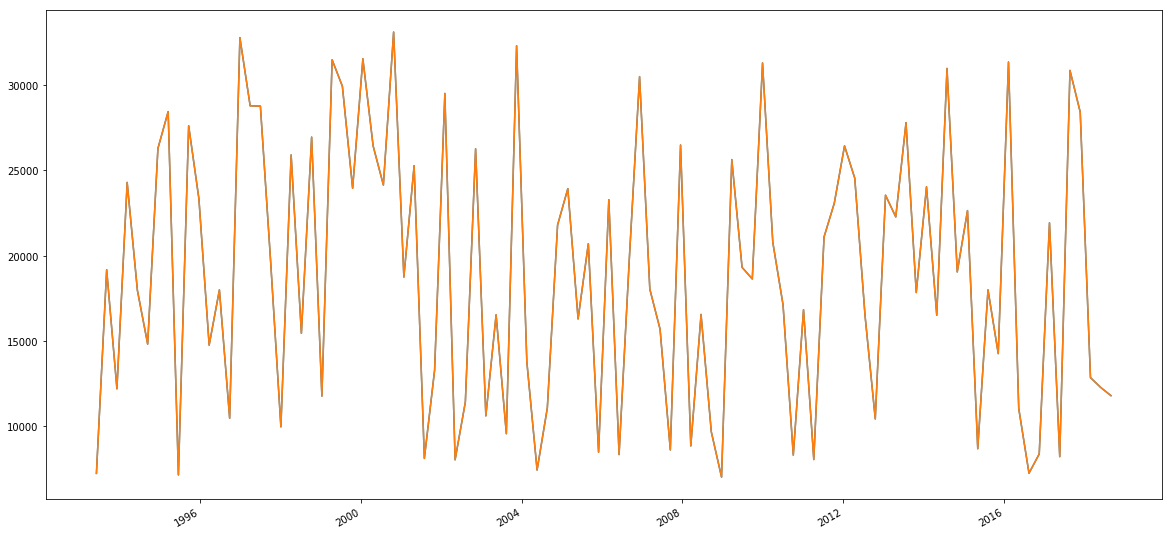

In [13]:
ts = pd.Series(govexp, index=pd.date_range('06/1993', '09/2018', periods=100)) 
# time series calling above array and giving a date range
ts.plot(figsize=(20,10)) # enlarging the size of the plot
ts.plot()

### GDP

GDP is a very random return in general it can range from a minus 5% to a plus 10% change.  It did lend itself very well to this project.

In [14]:
np.random.seed(2) # seeding the random generator so that the same values are returned
GDPchange = np.random.uniform(low=-5, high=10, size=(100,)) # numpy.random.uniform package giving 100 floats from -5 to 10
GDPchange

array([ 1.53992353, -4.61110652,  3.24493717,  1.52983589,  1.30551703,
       -0.04497768, -1.93027049,  4.2890645 , -0.50517989, -0.99759087,
        4.31700749,  2.93713141, -2.98130082,  2.70367182, -2.23340202,
        6.78002722,  7.80962939,  2.41355256,  7.69842228, -3.80531784,
        2.57869135, -4.02070243,  1.42183491, -3.55203627, -3.09260042,
        3.95117963, -1.60981999, -3.39581474, -1.69540689,  0.24739428,
        2.01681227, -1.97385161,  4.60610088,  2.24604753,  2.5785508 ,
        0.80338977,  6.90456182,  3.70006268, -2.56552102,  5.5112852 ,
        9.4682662 ,  2.50012542,  8.34280096,  0.12420479,  3.50716191,
        1.41318945,  1.55120895,  6.64838777,  3.0340626 ,  9.3061334 ,
        3.1631224 , -3.76857617,  0.49513603,  7.76275756,  1.09412565,
       -4.59196451, -1.29234142, -3.99283444,  9.90778017,  9.5587047 ,
        7.00387527,  4.02725682,  6.47439791, -2.4616183 , -0.60465152,
        2.86100313,  0.34936422, -4.31481552,  9.74730168,  1.62

In [15]:
np.around(GDPchange, decimals=2, out=None) # rounding our data 

array([ 1.54, -4.61,  3.24,  1.53,  1.31, -0.04, -1.93,  4.29, -0.51,
       -1.  ,  4.32,  2.94, -2.98,  2.7 , -2.23,  6.78,  7.81,  2.41,
        7.7 , -3.81,  2.58, -4.02,  1.42, -3.55, -3.09,  3.95, -1.61,
       -3.4 , -1.7 ,  0.25,  2.02, -1.97,  4.61,  2.25,  2.58,  0.8 ,
        6.9 ,  3.7 , -2.57,  5.51,  9.47,  2.5 ,  8.34,  0.12,  3.51,
        1.41,  1.55,  6.65,  3.03,  9.31,  3.16, -3.77,  0.5 ,  7.76,
        1.09, -4.59, -1.29, -3.99,  9.91,  9.56,  7.  ,  4.03,  6.47,
       -2.46, -0.6 ,  2.86,  0.35, -4.31,  9.75,  1.62,  2.56, -0.15,
       -1.1 ,  0.8 ,  7.48,  6.05,  0.69, -4.8 ,  6.96, -0.96,  3.74,
       -4.62,  4.93,  0.81,  2.46,  1.22,  0.26,  3.26,  9.59, -3.31,
       -0.3 , -4.37,  6.08,  4.86, -1.78,  1.25,  4.66,  4.92, -2.44,
        8.22])

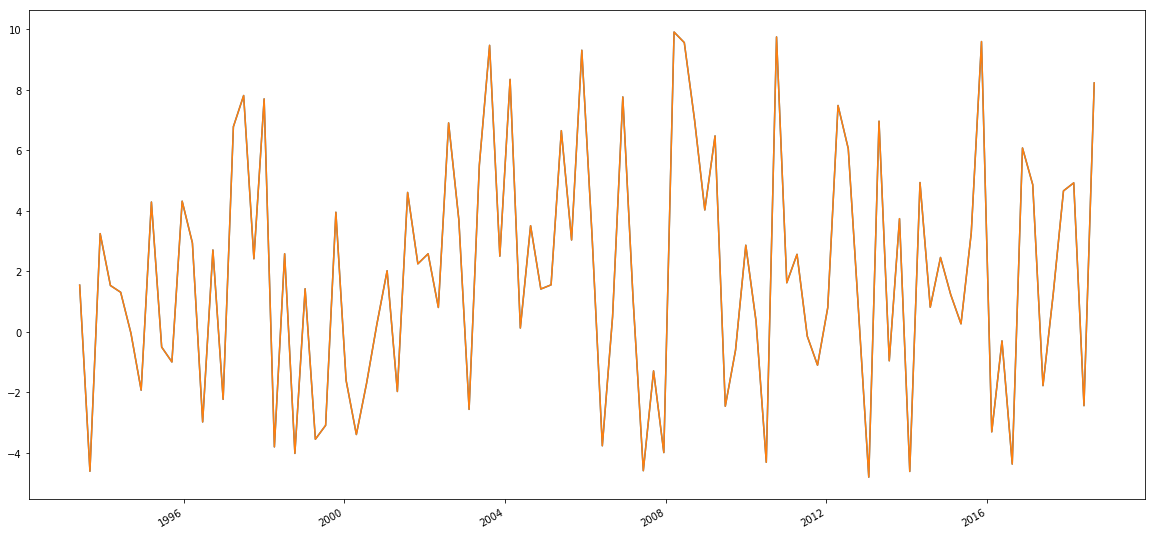

In [19]:
ts = pd.Series(GDPchange, index=pd.date_range('06/1993', '09/2018', periods=100)) # time series array and date range
ts.plot(figsize=(20,10)) # enlarging the figure size
ts.plot()

### Currency Euro / British Pound Sterling



In [20]:
startprice = .613

In [21]:
np.random.seed(123456789)

exgbp = np.random.uniform(-.01, .01, 100)

exgbp

array([ 6.56660496e-04,  6.82732018e-04,  1.91060711e-04,  4.27128064e-03,
       -4.86002090e-03,  5.05387218e-03,  7.67758367e-03, -6.90201835e-03,
        3.41092877e-03,  2.86890317e-03,  4.47254338e-03,  4.97450400e-03,
        6.37094790e-03, -8.04182954e-03, -9.92892186e-03, -5.38380769e-03,
       -9.75489733e-03, -2.92916578e-03, -6.29437046e-03,  5.85536807e-03,
        2.24344051e-03,  7.98858251e-03, -3.69264441e-03, -1.86689115e-03,
        9.60517207e-03,  8.41303598e-04, -5.15410776e-03, -4.95516636e-03,
        1.30311573e-03, -7.33326240e-03,  7.52517118e-03, -3.93362899e-04,
       -4.33348264e-03,  7.84421562e-03,  6.55263941e-03,  9.59940940e-03,
        7.34465944e-03, -6.12988694e-03, -9.10186537e-04,  6.10365563e-03,
        4.94462833e-03,  8.39919437e-03, -5.59060141e-03,  9.95906196e-03,
        2.05593041e-03, -9.28963085e-03,  1.11042157e-03, -3.60714956e-03,
        4.20924907e-05,  6.62434339e-04,  3.25026780e-03, -8.34486363e-04,
       -7.80247234e-03,  

In [22]:
eurogbp = np.around(exgbp, decimals=4, out=None) # rounding to 4 decimal places
eurogbp

array([ 0.0007,  0.0007,  0.0002,  0.0043, -0.0049,  0.0051,  0.0077,
       -0.0069,  0.0034,  0.0029,  0.0045,  0.005 ,  0.0064, -0.008 ,
       -0.0099, -0.0054, -0.0098, -0.0029, -0.0063,  0.0059,  0.0022,
        0.008 , -0.0037, -0.0019,  0.0096,  0.0008, -0.0052, -0.005 ,
        0.0013, -0.0073,  0.0075, -0.0004, -0.0043,  0.0078,  0.0066,
        0.0096,  0.0073, -0.0061, -0.0009,  0.0061,  0.0049,  0.0084,
       -0.0056,  0.01  ,  0.0021, -0.0093,  0.0011, -0.0036,  0.    ,
        0.0007,  0.0033, -0.0008, -0.0078,  0.0046,  0.0057, -0.0072,
        0.0068, -0.0019, -0.0019, -0.0026,  0.0083, -0.0002,  0.0093,
       -0.0086, -0.0028, -0.0091, -0.0033, -0.0019, -0.0053, -0.0059,
        0.0087,  0.0015,  0.0025,  0.0069, -0.0065,  0.007 , -0.004 ,
        0.0067,  0.0092, -0.0077, -0.0077, -0.0091,  0.0016, -0.008 ,
       -0.0057, -0.0066,  0.0095, -0.006 , -0.0064, -0.0046, -0.0045,
        0.0061, -0.0065, -0.0038, -0.0007,  0.0061,  0.0064, -0.006 ,
       -0.0069,  0.0

In [23]:
data = np.concatenate((startprice , eurogbp), axis=None) # concatenate the start price and array
data

array([ 6.13e-01,  7.00e-04,  7.00e-04,  2.00e-04,  4.30e-03, -4.90e-03,
        5.10e-03,  7.70e-03, -6.90e-03,  3.40e-03,  2.90e-03,  4.50e-03,
        5.00e-03,  6.40e-03, -8.00e-03, -9.90e-03, -5.40e-03, -9.80e-03,
       -2.90e-03, -6.30e-03,  5.90e-03,  2.20e-03,  8.00e-03, -3.70e-03,
       -1.90e-03,  9.60e-03,  8.00e-04, -5.20e-03, -5.00e-03,  1.30e-03,
       -7.30e-03,  7.50e-03, -4.00e-04, -4.30e-03,  7.80e-03,  6.60e-03,
        9.60e-03,  7.30e-03, -6.10e-03, -9.00e-04,  6.10e-03,  4.90e-03,
        8.40e-03, -5.60e-03,  1.00e-02,  2.10e-03, -9.30e-03,  1.10e-03,
       -3.60e-03,  0.00e+00,  7.00e-04,  3.30e-03, -8.00e-04, -7.80e-03,
        4.60e-03,  5.70e-03, -7.20e-03,  6.80e-03, -1.90e-03, -1.90e-03,
       -2.60e-03,  8.30e-03, -2.00e-04,  9.30e-03, -8.60e-03, -2.80e-03,
       -9.10e-03, -3.30e-03, -1.90e-03, -5.30e-03, -5.90e-03,  8.70e-03,
        1.50e-03,  2.50e-03,  6.90e-03, -6.50e-03,  7.00e-03, -4.00e-03,
        6.70e-03,  9.20e-03, -7.70e-03, -7.70e-03, 

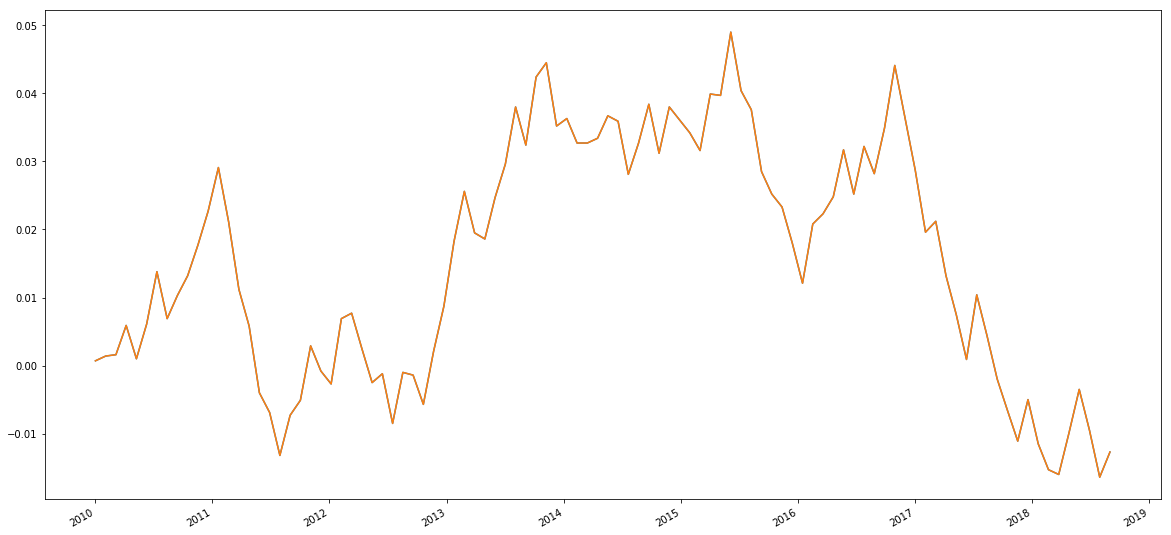

In [42]:
ts = pd.Series(eurogbp, index=pd.date_range('01/2010', '09/2018', periods=100))

ts = ts.cumsum()
ts.plot(figsize=(20,10))
ts.plot()

### New Car Sales

I watched a news report showing the new car sales from November 2018 were announced and thought that it could be an interesting indicator of how an economy is preforming.  After thinking about it I am wondering if the distribution will be very skewed towards the start of the year and now with 2 new reg markers each year skewed towards January and July.  From looking at the cso.ie website my initial thoughts are that the Pareto distribution may
be a good fit for this type of data but I am not sure.  

Since 2016 the new registration period changed from 12 months to 6 months.  I have downloaded the new car registration figures from the cso.ie website.  I have tried as much as I can to approximate the data in each period.  I have synthesised each period and then aggregated them.



In [25]:
np.random.seed(1) # choosing seed 1
newcar09 = np.random.randint(125, size=12) # 12 monthly random numbers from 0 to 125
newcar09 = np.sort(newcar09, axis=-1, kind='quicksort', order=None) # sorting our numbers in numerical order
newcar09[:] = newcar09[::-1] 
# reversing the sort so that the numbers are from highest to lowest 
# reversing the sort as the most new registrations are at the begining of the registration period
newcar09

array([107,  79,  76,  75,  72,  64,  37,  16,  12,   9,   5,   1])

In [26]:
np.random.seed(2)
newcar10 = np.random.randint(125, size=12)
newcar10 = np.sort(newcar10, axis=-1, kind='quicksort', order=None)
newcar10[:] = newcar10[::-1]
newcar10

array([109, 104,  82,  75,  72,  49,  43,  40,  34,  22,  15,   7])

In [27]:
np.random.seed(4)
newcar11 = np.random.randint(150, size=12)
newcar11 = np.sort(newcar11, axis=-1, kind='quicksort', order=None)
newcar11[:] = newcar11[::-1]
newcar11

array([137, 129, 122, 109, 104, 103,  94,  87,  58,  57,  55,  50])

In [28]:
np.random.seed(5)
newcar12 = np.random.randint(150, size=12)
newcar12 = np.sort(newcar12, axis=-1, kind='quicksort', order=None)
newcar12[:] = newcar12[::-1]
newcar12

array([144, 143, 118, 113, 112,  99,  80,  73,  44,  27,   8,   7])

In [29]:
np.random.seed(6)
newcar13 = np.random.randint(125, size=12)
newcar13 = np.sort(newcar13, axis=-1, kind='quicksort', order=None)
newcar13[:] = newcar13[::-1]
newcar13

array([109, 106, 106,  99,  84,  80,  79,  73,  62,  25,  10,   1])

In [30]:
np.random.seed(7)
newcar14 = np.random.randint(175, size=12)
newcar14 = np.sort(newcar14, axis=-1, kind='quicksort', order=None)
newcar14[:] = newcar14[::-1]
newcar14

array([151, 142, 136, 110, 103,  92,  89,  72,  67,  42,  25,  23])

In [31]:
np.random.seed(8)
newcar15 = np.random.randint(210, size=12)
newcar15 = np.sort(newcar15, axis=-1, kind='quicksort', order=None)
newcar15[:] = newcar15[::-1]
newcar15

array([195, 191, 136, 133, 109, 105, 104,  85,  84,  83,  60,  48])

In [32]:
np.random.seed(9)
newcar161 = np.random.randint(270, size=6)
newcar161 = np.sort(newcar161, axis=-1, kind='quicksort', order=None)
newcar161[:] = newcar161[::-1]
newcar161

array([251, 126, 125,  65,  56,  22])

In [33]:
np.random.seed(9)
newcar162 = np.random.randint(220, size=6)
newcar162 = np.sort(newcar162, axis=-1, kind='quicksort', order=None)
newcar162[:] = newcar162[::-1]
newcar162

array([182, 150, 126, 126,  92,  56])

In [34]:
np.random.seed(11)
newcar171 = np.random.randint(275, size=6)
newcar171 = np.sort(newcar171, axis=-1, kind='quicksort', order=None)
newcar171[:] = newcar171[::-1]
newcar171

array([269, 191, 161,  91,  80,  71])

In [35]:
np.random.seed(12)
newcar172 = np.random.randint(220, size=6)
newcar172 = np.sort(newcar172, axis=-1, kind='quicksort', order=None)
newcar172[:] = newcar172[::-1]
newcar172

array([195, 155, 134, 130,  75,   3])

In [36]:
np.random.seed(13)
newcar181 = np.random.randint(260, size=6)
newcar181 = np.sort(newcar181, axis=-1, kind='quicksort', order=None)
newcar181[:] = newcar181[::-1]
newcar181

array([244, 230, 176, 153,  74,  16])

In [37]:
prng = pd.period_range('01/2009', '06/2018', freq='M')
prng

PeriodIndex(['2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
             '2009-07', '2009-08', '2009-09', '2009-10',
             ...
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06'],
            dtype='period[M]', length=114, freq='M')

In [38]:
data = np.concatenate((newcar09, newcar10, newcar11, newcar12, newcar13, newcar14, newcar15, newcar161, newcar162, newcar171, newcar172, newcar181), axis=0)
# concatenate the different nedw car periods into 1 data array
data

array([107,  79,  76,  75,  72,  64,  37,  16,  12,   9,   5,   1, 109,
       104,  82,  75,  72,  49,  43,  40,  34,  22,  15,   7, 137, 129,
       122, 109, 104, 103,  94,  87,  58,  57,  55,  50, 144, 143, 118,
       113, 112,  99,  80,  73,  44,  27,   8,   7, 109, 106, 106,  99,
        84,  80,  79,  73,  62,  25,  10,   1, 151, 142, 136, 110, 103,
        92,  89,  72,  67,  42,  25,  23, 195, 191, 136, 133, 109, 105,
       104,  85,  84,  83,  60,  48, 251, 126, 125,  65,  56,  22, 182,
       150, 126, 126,  92,  56, 269, 191, 161,  91,  80,  71, 195, 155,
       134, 130,  75,   3, 244, 230, 176, 153,  74,  16])

In [39]:
s = pd.Series(data, index=[prng])
df=pd.DataFrame(s)
print(df.head(6))
print(df.tail(6))

           0
2009-01  107
2009-02   79
2009-03   76
2009-04   75
2009-05   72
2009-06   64
           0
2018-01  244
2018-02  230
2018-03  176
2018-04  153
2018-05   74
2018-06   16


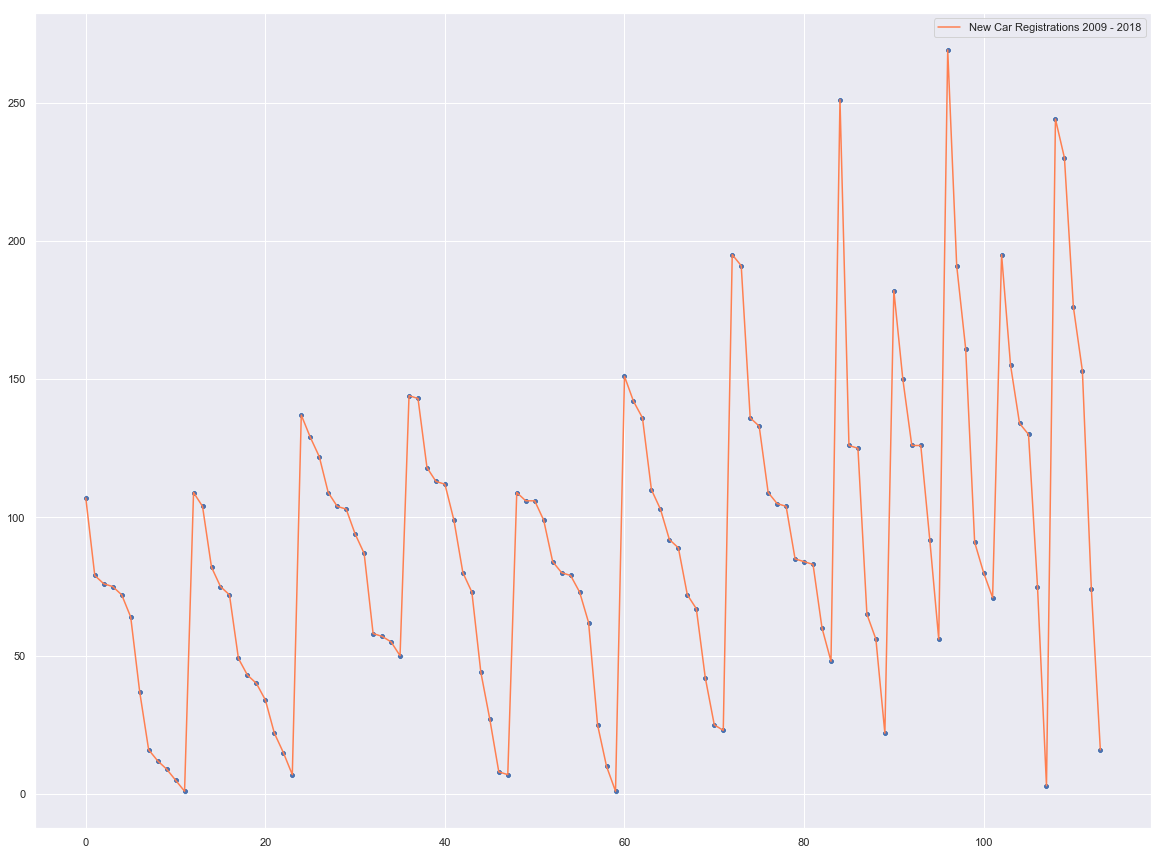

In [44]:

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(data=data)
sns.lineplot(data=data, color="coral", label="New Car Registrations 2009 - 2018")



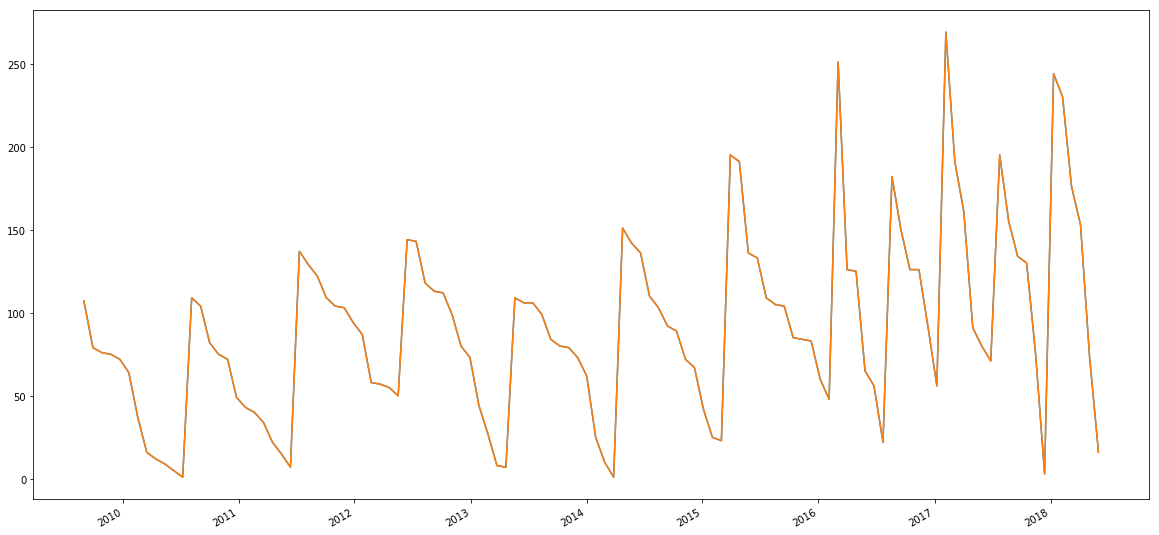

In [43]:
ts = pd.Series(data, index=pd.date_range('09/2009', '06/2018', periods=114))

ts.plot(figsize=(20,10))

ts.plot()

https://en.wikipedia.org/wiki/Brownian_motion

https://en.wikipedia.org/wiki/Geometric_Brownian_motion

https://www.scipy-lectures.org/intro/numpy/auto_examples/plot_randomwalk.html#sphx-glr-download-intro-numpy-auto-examples-plot-randomwalk-py

https://stackoverflow.com/questions/16734621/random-walk-pandas

http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://www.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=FIM02&PLanguage=0

https://ec.europa.eu/eurostat/statistics-explained/index.php/Employment_statistics

https://www.cso.ie/en/releasesandpublications/er/gfsq/governmentfinancestatisticsquarter12018/

https://data.oecd.org/gdp/quarterly-gdp.htm#indicator-chart